In [1]:
pip install fast-bert

     |████████████████████████████████| 92kB 5.5MB/s eta 0:00:011
     |████████████████████████████████| 3.0MB 14.4MB/s 
     |████████████████████████████████| 778kB 58.1MB/s 
     |████████████████████████████████| 317kB 54.9MB/s 
     |████████████████████████████████| 1.1MB 51.5MB/s 
     |████████████████████████████████| 890kB 54.5MB/s 
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=2e55ec71672645ddb399045e92b73ef91577f8e4d5f07d81a5f1df60e5a67c8d
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=870add381ab114b390ee4d46c65b5eeeac2781ff9ded70baf07ad3f1d3cd064c
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built seqeval sacremoses


In [2]:
from fast_bert.data_cls import BertDataBunch

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
root_dir = "/content/gdrive/My Drive/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
#Root directory for dataset
dataroot = "/content/gdrive/My Drive/topic_modelling_2"

In [5]:
databunch = BertDataBunch(dataroot, dataroot,
                          tokenizer='bert-base-uncased',
                          train_file='train.csv',
                          val_file='val.csv',
                          label_file='label.csv',
                          text_col='Text',
                          label_col=['Autosampler-Onfido', 'Embedder', 'Speech_Diarization', 'Website_Optimization'],
                          batch_size_per_gpu=8,
                          max_seq_length=256,
                          multi_gpu=True,
                          multi_label=True,
                          model_type='bert')

In [31]:
from fast_bert.learner_cls import BertLearner
from fast_bert.metrics import accuracy
import logging
import torch

logger = logging.getLogger()
device_cuda = torch.device("cuda")
metrics = [{'name': 'accuracy', 'function': accuracy}]

learner = BertLearner.from_pretrained_model(
						databunch,
						pretrained_path='bert-base-uncased',
						metrics=metrics,
						device=device_cuda,
						logger=logger,
						output_dir=dataroot,
						finetuned_wgts_path=None,
						warmup_steps=500,
						multi_gpu=True,
						is_fp16=True,
						multi_label=True,
						logging_steps=50)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultiLabelSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultiLabelSequenceClassification were not 

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


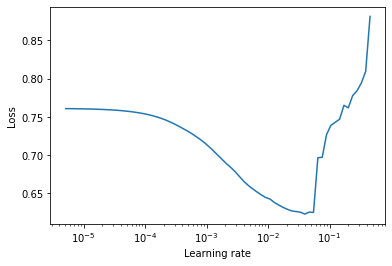

In [32]:
learner.lr_find(start_lr=1e-6,optimizer_type='lamb')

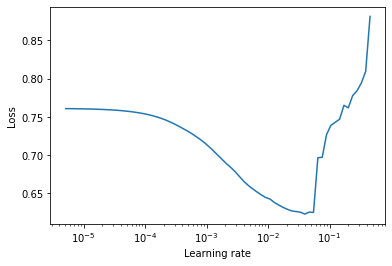

In [33]:
learner.plot()

In [34]:
learner.fit(epochs=10,
			lr=6e-6,
			validate=True, 	# Evaluate the model after each epoch
			schedule_type="warmup_cosine",
			optimizer_type="lamb")

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


(60, 0.7467348267634709)

In [35]:
learner.save_model()

In [36]:
text=[' Well, Francis. Hey, that many, Uh, how much are you going? Good. My Danish. Heavily and always already doing dish. Yeah, he does a lot of restaurant now. Are you packing your stuff? Yeah. Okay. There s a Lord. Go back through enough. Are you of Sorry? Fences. I didn t get you. Are you moving? Yeah, I m moving from house. Okay, so we re not there to help you. Sorry. Yeah. You let the sign it. Trite thing. This is one of the things you cannot do. Like the the zoom Kahlo, Actually, Yeah. Let me like I am again my visit. I said Okay. Did you did you hear Francis that of finishes living us living the fellowship, or you don t know that I I didn t know that. Oh, okay. Yeah. So do there is my large Docker. Oh, cheesy last day. Yeah. Oh, it s you and me a game? Uh huh. I mean, we ll manage, but I mean yet, you know  working with you to gnash uh, no e really, Adam, Like under new team members, like on their known Younes. They re known you team members know all about the new goes. They haven t been. You see, I haven t had from them, like in, like, 10 days or so. Absolutely. I gave them a task and, like, I gave them everything that they needed to like do it. And, Ah, like I didn t hear back. So eventually I did the task myself, and I asked if they like, looked at it and and she said she didn t even look at it. You know, the thing is that this type of projects, it s not like wear doing everything in their like we don t have much time for doing things you need people who do things independently. You cannot baby sit like every person. There is no time for right, right? Yeah. So I was actually trying at the beginning. I really, really wanted and tried to help help them. But if they re not interested there, there s not much streaking  Yeah. I mean, they didn t says the no dating in the Air Force, so it didn t. So that s actually that s another. Another test, if I haven t been haven t been like talking to them. And they re not asking for anything or they re not just telling us anything. So it basically means that they do not consider this themselves part of the team. Yeah, absolutely. Yeah. Anyway, so, Dinitia, there is one thing I still need from you. So the other part, fortunately, was resolved. So just show us where you are. Just ah, creating that area, Uh, like latent image presentations so that we can apply like the U map and everything there and go from there if you can show us verities. And, uh, where should we do it? Okay. Yeah, answered.  Okay, so yesterday humidity. And isn t this great?    but I  this.  Yes, that s that s  you know what there was? There were two things that were just so there was this one thing and there was one other thing that was really, really interesting that ah, actually was making us not to, not to.  was the fact that when you say the data sets here, the the only like that data bunch and you went to the other codes.  Yeah, I know. I know what you re saying. I know like and I can tell you what to say.  Oh!  closed, and they are.  No, I just I wanted to say something else. No, no, they ve been rob. So the problem is venue when you save something there. And if you don t really start this notebook, it s not going to reload from the safe date. If I that s  we were deciding that.  Yeah, I mean.  in the Okay, so I didn t notice. Actually, I didn t. I wasn t doing this. I was just running the same. And I was just thinking, okay, if I just loaded from the fire is just gonna load You changed five, But so it it caused me a lot of issues because I made changes that I wouldn t see anything there, and it was just    what I  loaded it at once.  I loaded.  just 96.  Yeah, that s that s That s true. Yeah, because because that s the thing. That s so I think like the they much assumes that data is in, like form format 96 96 tree. But for the network, it needs to be like 3 96 96 when loading it. It just changes the    If you do it twice, it just doesn t twice just transposing the dimensions.  Yes, yes, there. There are a lot of yeah, that s that s issue. There are, like a lot of like like discrepancies between fast AI and PyTorch. And there are a lot of, like things you need to land there. That s that s what s causing all these issues that we re dealing with. But yeah, again. Fortunately, it was a result, so at least we can you can get.  the results for fixed match over the weekend. So you are saying so where are we gonna see that?  R.N.N..  now is.  So we have to run to score, which will save the day. Doubles on the respective re presentation with labels. So maybe this is the fault. I think that s the for  very creating those.  Well, I don t want to do it. Read from C s before. I just wanna have the  Oh, yes. Oh!  like this is my  there. These are my large, it s  emissions from.  Docker number C.N.N..  presentations is an airy, so the representations an area off size like the rows are the number of batches on the Collins are the the embedding size right?  Yes, yes, that s  it s 16 cross.    Okay, so Okay, that s  so nine.  like for every bad to deceiving it.  Yes, we find. So what I thought was it was like I saved V.S..  then I combine all of  uh  So have you done that? What? Have you just combine them old into one system somewhere? Haven t done their e. I have stuck ordinarily for that. But then I was reading for the new government.  of your presentation.  so maybe not. It s now that we have that.  of eating and  so I think I have food like this.  under the present patients, the labels on the respective.  after the way we don t need. The labels should also be in the data bunch, right?  for If  I heard that I somebody already have the labor.  so Okay, that s that s great. So  Ah.  if you are busy, like you wanna go packing and do other, so I can actually just, uh, do the U map and everything myself and creating the ways. But if you want to do it and that s just fine, it s up to you. Well, what?  I can t dream the Morgan again.  I think that even  I will combine them in a CSE file and I would  so that you can use it.  Okay, So if you Yeah, that s fine. Yeah. Yeah, if you can do that, because I can. So when you re down predator like in the evening, I will just so use the data bite and you re like, combines history and then I will Ah ah ah!  that s fine.  you you memory thing does.  it s present in the score, so it s  for you. Yeah, I know. I know. I had that said the court for that part too, so, yeah, that s the    the gate he is.  so No. Yeah, I have everything for for that.  this.    Andi? Yes, I  presentations. I don t noted, Ellison combined them and applauded of, you know, here and then I ll severe that they re here uploaded the deepest additional.  that said anything. So do you mind if I use your  Yeah, I saw it has  Joonas Neftci can use it. Yeah, I m out of like I only have, like, Keras.  so.  Yeah.  uh, maybe.  sick. Just bring me that.  off. Okay, great. Yeah, I guess we need to also, I don t know. I I think it s probably would be just Francis and me. Just we have to go over all the cold and just I clean them up. A document. Emily that beat and  like attitudes are get average repository because at the moment everything is like just, uh, like, separated on different incenses. They re not in the same place and they re not very.  way.  on, Dad, I guess. Do you think you will be so when you re living the fellowship, you You think you will be answering our  Uh huh.  I m not so.  No, no, I don t mean I don t mean that in this leg. Just give us your email. And if if you needed to ask you something, just need clarification. But something with this week s match code, something like that.  grand compared me, okay?  Yeah, I was just wondering maybe if you meant when you leave the fellowship, we don t even really want to hear.  okay?  Yeah.  sometimes.  Yes, I have.  base, Yeah.  car people.  year. It s great, Thank you.  I guess it s  best of luck with their  Yeah.  Giulio.  I know so  do you so?  maybe. Oh, yeah. Okay. Is  for.  the room.  uh, it s a  but then  they I m loving. Take that.  for the  good. Yeah, by the way, it s nice hearing that you decided to complete the thesis.  for you. Yeah, it actually does.  for there was totally  A.B., 30.  were there. Now if you like.  do some more, you search for bed.  Yeah, it s actually good. Good. Also, for a carrier, if you do some if you finish, your thesis is actually  when you just say I have a masters of, like a piece of space massive.  Yeah.  I just need you to do that.  like, okay?  and and so  it s great.  Yeah, Happy for you. And, uh, yeah, they said it s just good.  the rest of your.  you know I have.  maybe I don t know you faith. If you If you explain it to our shock that you basically you are good times that are check. Maybe he still keeps you on this.  No. Yeah, maybe.  I don t know.  if if if.  do. We will probably kill you. Yeah.  he like. He was. Yeah, OK, that s fine.  good.  Ah, yeah.  So I run the court now and generate the D presentations and combined them.  great.  So just let me know when you re done, and I will take it from there. Thanks.    that stuff. Look to you guys too. Oh, thank you. Thank you so much. It was It was very nice working with you and knowing you. And, uh, they said hope.  and touch the eye. Sight. Yeah, people switch on d. I agree. It is nice working with the internationalists.  you. So anything else? Uh uh, stresses.  not that I could think of, I guess. Like, uh, I totally forgot about to get hub. So I guess I ll just, like, start working on that. Okay, that s that s good. If Yeah, if you just upload everything and just, uh yeah, so I think this is we still need to do some, like documentation. Just commenting at some common circled something like that. I wasn t aware that that was, like, needed anywhere. I thought just the right up would be. That would be I don t know, maybe maybe yeah. Maybe you re right. Maybe it s just me, but on a c fear, we re going to upload it some. Very. If it s not documented, it s not gonna look very good, so I don t know.  e u food. Starchild. Because if some of the group is taking I dis project, maybe the Villafana David referred Accord. Yeah. Yeah, I will. I will talk to our shock about this. Definitely. Yeah. Okay. I guess that s it for today. All right. Yeah. Don t be in such Thank you, but no, thank you. ']

In [37]:
predictions = learner.predict_batch(text)

In [38]:
predictions

[[('Autosampler-Onfido', 0.6003648042678833),
  ('Speech_Diarization', 0.5444415211677551),
  ('Embedder', 0.5307173728942871),
  ('Website_Optimization', 0.3953910171985626)]]

True label Autosampler

In [39]:
text=['   you guys? No. All right. It s, uh I was actually looking for the link once. Hospital. Yeah. I just Are you, I think. Yeah. Hey, send a link on being a better group.  Oh, okay. Okay. So it seems everybody s here except a progress, right? Yeah, I think so. He was late yesterday as well. Yeah. Yeah. Start if you want. Yeah, well, let s just start. Oh, I think I like home. We can t have started the pieces you. So if you want to give him, give us an all day Sophie and money for your mutual self. Aria, something came up. I was asking the phone call. It was in there. Just, um, served with that.  update. All right, so I fit Line sees model on it. Gave out, actually. Uh, so what I did I didn t use any transformation. I don t know. You using any? Um, just doing a size 2 24 You could have been still making more, but I did to 24 with President 18. I think it s good enough.  the current.  good, Yeah.  before.  it is so good.  like a kind of a mountain. Yeah.  I do want.  a problem woman.  just before I m freezing, and then I would  I get I  Well, thanks.  think this is the Spanish state.    uh  checking.  okay?    of learning learning, Lee. Well, I keep this.  Oh!  black it. But anyway, like this didn t change. Um  then I saved the model.  I wanted to do the statistics of  sort of negative.  can a loaded Here s the thing I refreshments.  new collection.  I don t know what.  error because it used to work before he was working.  the Labours No.  our.  next.  live with from the    view loaded.  probably.  for the same. I thought maybe I  the previous one.  for SE model, it would be the same thing.  English.  I didn t.  before, but it was working.  on, I  these values to your number classes this sensitive 60.  to get some statistics, but I would.      because let s  like the size of these ones are different. I don t know where the areas, so that.  you are. But now I get this earth.  so it s thinking.    what I can do, but anyway, yeah.  9%.  and it s really scheduled for myself. Um, this statistics is really important to get.  this morning, I found our label is very likely to be over.  dirty label has a mawr higher mountain.  I was sure.  later.    so that that s what  guy and also  um I can  in distance.  Oh, we don t need to.  and some any model or  For now, I would just like implant.    others that I had in comebacks and then just get there.    averted toe rgb and then  Listen, um, so I would look.  sit here, and that s single.  so.  but I got what was it like?  an orange.  maybe go.  tall 10 or 20.  similarities.  among those I would check.    I would blanket but the other way around and  but  actual outcome, but  Gordon and get to my Euclidean This is    so have you.  don t know.  Let s see. Oh, there is one other thing that we should    to see the  A.B..      Yeah.      goes on.  on shows just to sing.  I mean, this is G. I was kind of confused myself, but  see if it gets.  because I think    is it the older version of this decision?  the same a P M model that you have had it like.  um, solid.  on.  No, you    but you guys.  some.  the  We haven t changed BCG yet because  this is she s not completed.  with a PM what were just doing?  running Aquarian.  with its.  with his own attributes wait and just finding.  uh  so like something like this that  Well, I thought that was  but like  I think I should nose  on it on the news.  it s not ready and I  Docker Is Stephen a hostage with order decision? If it was just like  the text.  relying on their visual similarity.  correct cost. Maybe you could.  Yeah, I think like, Oh, the working version that we have is that older version off the Ziggy. But then your aversion. Ah, like a You need to get like this. Sigh, miss working. What is?    I haven t done any implementation.    Well, not really.  Keras.  we re first going to do a lot of all image queries here on hand backs.    V.S. on you.  but they can be done. Work in parallel like you don t have.  does.  a person of that, I mean.  just sign with two.  it would be easier myself or  Yeah.  for them to be able to work on it.  tricky.  Yeah, because that s a one thing.  Monica, have you?  go understand?  right. Oh.  I mean, it s like  like, I mean, like, it s kind of more straightforward.  whoever is like New Rejoin.  because because a zai recalling  having difficult.  just understand the ankles. Positive. Negative. How d that go in a system?  and then    I think that was the main challenge there. So basically, the model was there. You got note? We get there showing, like, I think the mother was there. The main challenges that feed the data they say you don t.  okay?  How do you think? I mean? It might means like some two weeks, but basically, you just need to find a way.  and that s actually challenge. That should be.  Yeah, that That s one thing I don t think status if you If your family read PyTorch it ll of it and then I mean code A.B..  should be global.  Okay, so maybe  Oh!  in the national work this out.  work.    on the IAVI. I don t think you have to.    is ready. I mean, that can be no like    trouble.  if you have, like some working like a date, I don t know. Even with 100 a lot and you can probably feel  get some results, huh?  I think this was  he had a in this way because that s how you say.        creation.  and then the  okay?  Yeah, like that.  um  is it like a  King voice is specifying anything. Just just you have.  V.S..  work. Um, and I know like  so.  informant that you?  Oh!  Yeah, but the    it s for them like you.  but as soon as you need to define  Yeah. Um  to define it.  I would be it.    on a ship.  so with the anchors.  Yeah, from the A.B..  A.B..    to get the train and test data. Is it okay not to use?  basically rise.    Yeah.  cold.  it probably did. I I m sure I go. Once you re on it, you might get    the 50 runners that he run it on Friday.  Friday and I don t know.  running.  I mean, here he ran it down like, uh, uh, top.  Yeah.  wishes.    Yeah, but I don t.      if you have time. If you want, like a do you want to?  Oh!  I don t hate some religious to save a.  five now.    I m reading.  home.  okay?  you cut this short.    That was my Okay. Thank you. How about, like, the doctors? Yeah. Um, initial nicely.  um  the label.  the 30 later has three.  unique labels and  I got the highest average motive model because compared to the  right.  I think that  okay?  Oh!  what?  they re conceived.  G on the dirty label.  did you on the clean? LeBeau, they are.  on, we can see the tax.  on the  slightly and the motive.  increase.  so if the decision is no misleading.  we are forward.  maybe the  there.  the threshold.  it eliminate too many labels, but the binding and the    what I think way.  next.  is trying to.  upto Sophia like, got the model work and got some statistics. We could I m Rick laying our label.  statistics.  now this morning.  can I share my notebook with, You know, of course. Of course. So you would continue.  let me look into it.  Yeah, I can also do this. I can also  where you share with you the checkpoint that I have, but it seems that there s a  those models.  Yeah.      difference between the 00 decision and the new decision, Like what I m    So for the old one Visual.  results that you re getting.  getting it really based on.  Keras.  dependent, okay?  where the taste will one.  if the exact same was that you were.    he would get something.  an average of the entire.    Yeah, like if you re looking for green with all your textual dcj.    being labeled.  A.B. image.  Okay. Uh, retrieval image that you have If it s  so in case. So that would be a problem if you have.  it s actually like visually picks up on it.  So you re a text with  so, Yeah, I like that. That s kind of the problem.  doing.  retraining.  from whatever.  uh, is there a friend out and just doing?  all the Jews based on that triple it.  about the anchor images positive and the negative.  is being your Aquarian image positive.  similar.    seminar image, and then you run a  images.  okay?  isn t sensing, and that s for tech.  in a fashion corpus is different.  words to it rather than looking at the label of the    on to kind of get it.  we give this example is like  if you re looking for a blue.  Lopez.    should be OK like it s not a bad network.  who but  fairly close to blue anyway, so you get some.  Docker scored.    I just want to know. Learn more to make sure that  waiting. Oh.  that form.  so.  music.  Okay, Uh, can really one question if you re saying that so the original labels were, like around 400 right or regionally.  I would go 1 400 What? What is the one? I m killing ones? Um, Queen One. His near 400 then clean was was, like, fun. 50 right? Yeah, one, Could you? So what could be the reason that the decisions you can change or just the performance can change it? If you want to think about it in terms off, like labels, I think maybe we eliminate some useful label. That s what I m thinking, but yeah, but what is the criteria for their usefulness, A.B.?  the difference between the clean and, uh, youthfulness can be the f score that from? From from the modeler. So fear has trained for us. You haven t checked that? Yes. Right. You are having check that you re working on that? Yeah, we re working on that. Yeah, because I thought it does aspirin improve. So between those two sets there, some labels that are very, uh, they never something like, oh, like irrelevant words. Everything together it off. Yeah. Yeah, that s that s what Sure you re working on.  She s looking at those labels and based on the little literally based on the meaning, and it removes some no sense label. Yeah, that that s one part of the claiming. But the other part of the day it is the it s on the F score. Yeah, that s what I know. That the lower account that he also removed right you re you. Although the left recommend one less frequent once I think for that phone, I think we need the better logic. Um, I was never convinced. Like how Oh, what is the best way that we can do that? I think you re simply just dropping like the lower counts, but eyes  A.B. like some importance labels that there for Mr Mm. So one way to do this is that, like, to the original, Like a 3 99 levels. We just cleaned clean things, like removing any relevance work. Try it, M.L.. But we keep everything that is relevant. Even like if they re lower, your calorie counts. No, we re trying. So So So we see. Like, how does that, uh, just like removing every 11 words like gonna change things? Yeah. Yeah, that s that s actually Strayer is actually booking on the dirty label. Yeah, on the 399.  he She is removing the irrelevant label from from that lot originally. Okay, that s good. Yeah, because I was just reading about this text annoys ing and the nosing. It seems that kind of effect sometimes. Like No, isn t it? It s good if you add just like those awards, like, I don t know there. Ah, like I don t know, words like or or these things like they know. I don t know. Easter labels and their minds like improved performance. Yeah. So super clean might also not be that would like you can, like, read about this sex noise ing on demonising. It is kind of like an argumentation. Okay, horse are regarding either saying if there s any other technique, toe removed the labels rather than going based on the lower frequency of count. So I mean, I was wondering if there was anything that you know that will understand the semantic meaning of the label and then give breakage for each label. And then we could choose that legal like I m not sure like off something before their voters are Tom frequency and most Aquaman frequency, I guess. Idea. Kill something like Vato Beach  Actually, if there s something better the well, something that it could great Ege And then we can choose those Children. Neighbors? Yeah, that s a good point. So basically, there might be some labels with the very high count, but there might be some levels with no count, but those little ones there might be more related even the day less can buy. Yeah, so I I don t think like, necessarily just dropping goes no counter gonna help the model. So So maybe you can just, like, try some random ization like, don t drop anything with the local, but just like a choose Random said I  99 it may be a 200. So then don t out for, like, Villa still include the most know counts and the hype accounts? Or do we have anything that can understand the semantic money? And then, you know, rather than going based on the count because see, based on the weight digital labels or Yeah, I don t think like, Oh, I don t think anyone in the group has tried. Actually, that was one thing. Also, I mentioned like every I remember. Randy said we were just through that based on judgments, but the you re welcome to search. Like if there something, if you can find something about that that big. Okay, you know what? Maybe you can set a metric like I ll know what is like. So now we are, Or like, ordering them based on the counts. Right? Then if you can find some metric that gives this semantics for the fashion the corpus, then you can order them based on that semantic. Then the counts. Like me, lobby has a significant and I look for that and this one war doubt I had eyes it. Okay. Fresh M.L.  Oh, for the work of cleaning, like, other just looking over the documents. And I was confused between two miles oneness contesting my screen action. This, uh, this is Double cabin, which was under yours or live by stalkers for Docker. So here, basically what you re doing is so you re taking the device Labour s I mean, the vice peoples, and then you re Yeah. I mean, you re removing all the necessary words processing, getting the content stuff.  in the same thing for the  filed like for board.  Bieber s and  Yeah, first I will doing for each of them.  okay?  the way I was mixing it.  I gave some something s six unhealed.        Oh!    Can you go up? Okay?  um  they had some title like that. Well, most for Levi s bone for Docker. Kenny. Kenny. Sure, like, uh  about it.  because there was actually to approach one.  want the level separate.  Oh, combining  particular logic and there was one more.  buoyancy is spending.  together.  this. This is this is  okay?  mean by together.  I don t know.  get after cleaning.  can immerse, knows they can look at the merge doctors only place. I think that s  Yeah, V.S. school, though.  Yeah.  eyes it like a normal.  I mean, just combining the clean data for board Levi s.  the labels from a young that the logic was that like we were like doing cleaning for each of them.  Nazem.  they re also mixing them and else to do the  A.B.. Yeah, I was This kind of, like, confused which one before? Because this is one approach and the other approaches here where we re just taking one.  doctors and  Oh, something that  doing the cleaning, so I m not.  get Tau. Go ahead.  so.  I think. What I didn t like I don t know about the snow. Which one you re using? Block. Um what?  uh  I clean the Levi s data because that has, like, a lot of noise. The labels My Kalinda, Levi s and separately clean the Docker.  and then after the merger, I ll also applied still some beaning and also  all that counts.  Yeah, I ll probably look into it and Stephen?    Oh, yeah.  that you guys u n Steve were discussing the labours one. What do you mean by the one? The one which is more clean. Those lasers are, uh, off body body. Do you guys meant about the RCC filed with dirty liberals? There s labels, It s just news. Like, Ah, I think original labels that they have itself is still like it s not dirty because I think they have done some planning on it, but like the Levi s that we got at the labels.  they were not like as cleaning us. Okay, so that I think that s what you mean. Like my guarantee, but for sure, because we got that Levi s from the other people, right? So that s what it was like already down, some claiming they have some clinical. That s okay. So the direct draw file is what you mean by 30 cable fighter, but yes, exactly. The directly said, just as it was like a kind of that s what, like a state resident referring does like it. Did you? I have not going questionable like, um  um, are sharks. Intention is asking for a PM triplets, but it might be very well, the BCG the older recently that we have that you guys were running on doctors or it could be that he s asking for BCG, so I m unclear on that. So I might have to ask him about it, but right, but do you guys know it is? He has something in mind specifically, um, So there is no new model and I ve made that clear, like I just said that. I mean, if in the last update, I told that the whatever, it s not working as well as the documents  model, Uh, which is that a pants has already been done on it. A.B. in has already been done under. Yeah, well, you mentioned it. That hostage, some work on it started. I vaguely remember, uh, but it s not, like, completely done that much. I know. He came off like the challenges. No. Okay. Next. So, Haas, was that the a p n said that you were doing or was it the BCG older? Um, older, this DJ?  Hello? Can you hear me? Oh, yeah. Were you on you to something? So No, I was not Muto. Oh, it was not. So you re talking about. She was right. Um shoot. Model? Yes. A large and 24. His last version for ashes. His last vision. Okay, Yeah, I did some aprons on the shoes. And also the latest decision that we did You remember it well, after meetings with our second we present those okay, Latest was that s what that was the  I mean, which is the older version? Tolliver? OK, those like expel should be prepared to remember like that for the four data sets. Oh, the one that we hold it together. Yeah. Oh, I wanted that, but yeah. So maybe he s No, it s out. He s looking for Latin. You might have think ago. I said there s a new model for shoes. I Yeah. Yeah. Okay. So I make sure that that s say every 24 I think that if you did a good amount of seriously Plotly 27 Yeah. Yeah. So we hope that excel sheet ready, and, um and I  Ian said, I don t know. Maybe a pants I could be. I mean, if the BCG okay on it than and the model was almost deployable, like they re deploying it. So, uh, there won t be a need to run any extra any extra. BCG it. It s not the older version. Okay, Very, I m not looking to the a p and triplets it. If you have a pre A, do you have a peon said Ready? Or you just picked a handbag ones because they were using different Ural images and Korean just right for original over shoes for shoes. Yet, though for shoes it was, I clear preliminary. So I think, like the one that we have for the hand back, it s more like a solid for shoes like the corn Muslims still developed. I was just testing and the night sushi. All right, so then I would love to that she could buy. There s not being any model already been dcj on it on a PM test you could do against us, but do you think it would be as useful to do a P and triple it no A.B. in on its own like I don t think  A.B.. That s useful because it s basically you re just doing the quarry, right? Exactly. But I don t see much advantages. I think we need to get, like, this time. It s working like that, Of course. Yeah, I agree. Yeah. I didn t ask the first priority. Like even before the text. Robert. Probably. Yeah, I see. Yeah, let s have a discussion about three of their first working meeting for sure, right. Oh, I will send a like a reader. Okay, great. Thank you. So is there anything else when he s cost?  here. We can bend the meeting. Yeah. Okay. Yeah. Bye. OK, Thank you, by the way, like you guys might like to lay with our ship, right? Oh, yeah. One thing. Yes, actually sent invites to all of you would be tonight at 10. That will 10 p.m. e S e. I think he said that we don t have data. So your skin it ll? Yeah. So I thought it would be Tuesday, Tuesday.  Oh. So then I am for you guys. 10 p.m. sc? Yes. Okay. All right. Okay. We ll have a good one base. ']

In [ ]:
#True label= website optimization

In [40]:
predictions = learner.predict_batch(text)

In [41]:
predictions

[[('Autosampler-Onfido', 0.5913726687431335),
  ('Speech_Diarization', 0.5587692856788635),
  ('Embedder', 0.5574237704277039),
  ('Website_Optimization', 0.3916476368904114)]]

True lable  Embedder